In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import svm
from scipy import io
for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score # This is the only function you are allowed to use.
from scipy import io
import csv
import os
import argparse
import warnings
warnings.simplefilter('ignore')

def load_data(name):
    # Return the specified dataset by NAME
    return io.loadmat("data/%s_data.mat" % name)
mnist_data = load_data('mnist')
spam_data = load_data('spam')
cifar_data = load_data('cifar10')
all_data = [mnist_data, spam_data, cifar_data]

In [3]:
len(mnist_data['training_data'])

60000

In [4]:
#################################
# Question 1: Data Partitioning #
#################################
mnist_val_size = 10000
spam_val_size = round(spam_data['training_data'].shape[0]*0.2)
cifar_val_size = 5000
validation_sizes = [mnist_val_size, spam_val_size, cifar_val_size]

def partition(data, labels, validation_size):
    # output: training_data, training_label, validation_data, validation_label
    if data.shape[0] != labels.shape[0]:
        raise Exception("data size mismatch with label size!")
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    data_shuffle = data[indices]
    labels_shuffle = labels[indices]
    return data_shuffle[validation_size:], labels_shuffle[validation_size:], data_shuffle[:validation_size], labels_shuffle[:validation_size]

In [5]:
mnist_train = partition(mnist_data['training_data'], mnist_data['training_labels'], mnist_val_size)
mnist_train[2].shape

(10000, 784)

In [6]:
#################################
# Question 2: SVMs              #
#################################

def train(X, Y, c = 1.0):
    # create, train, and return and SVM Model
    #clf = svm.LinearSVC(C=c)
    clf = svm.SVC(kernel='poly', C=c)
    clf.fit(X, Y)
    return clf

def num_examples_experiment(X_train, Y_train, X_val, Y_val, num_examples_arr, name):
    # train an svm for each number of examples.
    # Evaluate the training and validation performance
    # plot the results.
    train_acc = []
    val_acc = []
    for example in num_examples_arr:
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X = X_train[indices]
        Y = Y_train[indices]
        model = train(X[:example], Y[:example])
        train_acc.append(accuracy_score(Y_train, model.predict(X_train)))
        val_acc.append(accuracy_score(Y_val, model.predict(X_val)))
    plt.figure()
    plt.plot(num_examples_arr, train_acc, label = 'train_accuracy')
    plt.plot(num_examples_arr, val_acc, label = 'validation_accuracy')
    plt.xlabel('number of example')
    plt.ylabel('model accuracy')
    plt.title(name)
    plt.show()
    return 

def main_q2():
    # Run all of the code for question 3.
    MNIST_NUM_EXAMPLES_ARR = [100, 200, 500, 1000, 2000, 5000, 10000]
    SPAM_NUM_EXAMPLES_ARR = [100, 200, 500, 1000, 2000, spam_data['training_data'].shape[0]] # Figure out the number of examples in the dataset or handle this case.
    CIFAR_NUM_EXAMPLES_ARR = [100, 200, 500, 1000, 2000, 5000]
        
    # YOUR CODE HERE
    all_examples = [MNIST_NUM_EXAMPLES_ARR, SPAM_NUM_EXAMPLES_ARR, CIFAR_NUM_EXAMPLES_ARR]
    all_names = ['MNIST Dataset','Spam Dataset', 'CIFAR10 Dataset']
    for i in range(3):
        dataset = all_data[i]
        data = partition(dataset['training_data'], dataset['training_labels'], validation_sizes[i])
        num_examples_experiment(data[0], data[1], data[2], data[3], all_examples[i], all_names[i])
    return

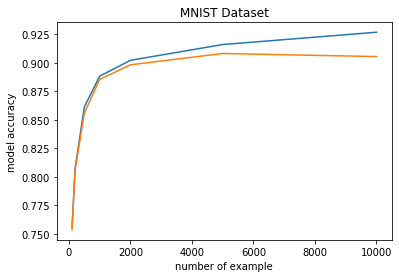

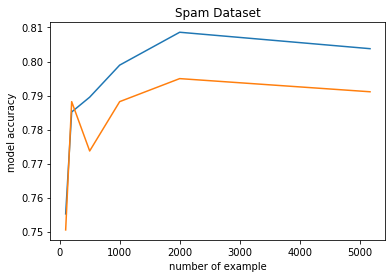

In [ ]:
main_q2()

In [7]:
#################################
# Question 3: Hyperparameters   #
#################################

def hyperparameter_search(X_train, Y_train, X_val, Y_val, parameter_values):
    val_acc = []
    for param in parameter_values:
        model = train(X_train, Y_train, param)
        val_acc.append(accuracy_score(Y_val, model.predict(X_val)))
    
    return val_acc

def main_q3():
    #c_values = [0.0001, 0.1, 0.5, 1.0, 2.0, 3.0, 5.0, 7.5, 10.0, 20.0, 50.0, 100]
    c_values = np.logspace(-9, 9, num=19)
    dataset = mnist_data
    size = 10000
    data = partition(dataset['training_data'], dataset['training_labels'], mnist_val_size)
    val_acc_1 = hyperparameter_search(data[0][:size], data[1][:size], data[2], data[3], c_values)
    c_val = c_values[np.argmax(val_acc_1)]
    
    new_c_values = np.logspace(np.log10(c_val)-1, np.log10(c_val)+1, num=10)
    data = partition(dataset['training_data'], dataset['training_labels'], mnist_val_size)
    val_acc_2 = hyperparameter_search(data[0][:size], data[1][:size], data[2], data[3], new_c_values)
    c_val = new_c_values[np.argmax(val_acc_2)]
    
    val_acc = np.append(val_acc_1, val_acc_2)
    params = np.append(c_values, new_c_values)
    
    plt.figure()
    plt.xscale('log')
    plt.scatter(params, val_acc)
    plt.xlabel('C values')
    plt.ylabel('validation accuracy')
    plt.title('parameter value VS validation accuracy')
    plt.show()
    print('highest c value is: ' + str(c_val) + ',with accuracy: ' + str(max(val_acc)))
    return 

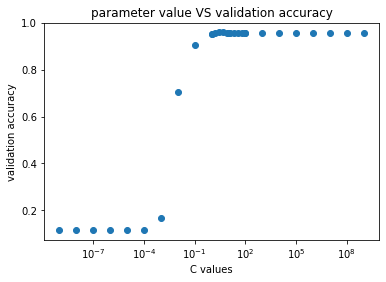

highest c value is: 4.641588833612778,with accuracy: 0.9591


In [8]:
main_q3()

In [63]:
#################################
# Question 4: KFold CrossValid  #
#################################

def k_fold_cross_validation(X_train, Y_train, k, parameter_values):
    val_acc = []
    for param in parameter_values:
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        x_shuffle = X_train[indices]
        y_shuffle = Y_train[indices]
        k_acc = []
        for i in range(k):
            start = int(np.floor(i*len(X_train)/k))
            end = int(np.floor((i+1)*len(X_train)/k))
            train_x = np.append(x_shuffle[:start], x_shuffle[end:], axis=0)
            train_y = np.append(y_shuffle[:start], y_shuffle[end:], axis=0)
            val_x = x_shuffle[start:end]
            val_y = y_shuffle[start:end]
            model = train(train_x, train_y, param)
            k_acc.append(accuracy_score(val_y, model.predict(val_x)))
        val_acc.append(np.mean(k_acc))
    
    return val_acc

def main_q4():
    c_values = np.logspace(-9, 9, num=19)
    dataset = spam_data
    val_acc_1 = k_fold_cross_validation(dataset['training_data'], dataset['training_labels'], 5, c_values)
    c_val = c_values[np.argmax(val_acc_1)]
    
    new_c_values = np.logspace(np.log10(c_val)-1, np.log10(c_val)+1, num=10)
    val_acc_2 = k_fold_cross_validation(dataset['training_data'], dataset['training_labels'], 5, new_c_values)
    c_val = new_c_values[np.argmax(val_acc_2)]
    
    val_acc = np.append(val_acc_1, val_acc_2)
    params = np.append(c_values, new_c_values)
    
    plt.figure()
    plt.xscale('log')
    plt.scatter(params, val_acc)
    plt.xlabel('C values')
    plt.ylabel('validation accuracy')
    plt.title('parameter value VS 5-fold-validation accuracy')
    plt.show()
    print('highest c value is: ' + str(c_val) + ',with 5-fold-accuracy: ' + str(max(val_acc)))
    return

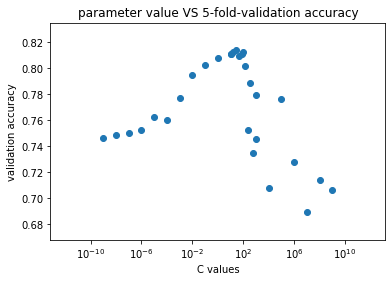

highest c value is: 27.825594022071243,with 5-fold-accuracy: 0.8138067072202133


In [64]:
main_q4()